In [8]:
import pandas as pd 
import wandb

In [9]:
wandb.login()

True

In [10]:
api = wandb.Api()

In [11]:
run = api.run("drigba/Medical Image Segmentation/w80t5nrl")
cols = ['_runtime', 'epoch', 'train_loss_epoch', 'val_loss', 'val_acc', 'val_dice', 'test_loss', 'test_acc', 'test_dice']
history = run.history()[cols]


In [12]:
history.tail(5)

,_runtime,epoch,train_loss_epoch,val_loss,val_acc,val_dice,test_loss,test_acc,test_dice
91,2187.288598,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2222.134735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2234.713303,13.0,NaN,0.223426,0.983916,0.7353,NaN,NaN,NaN
94,2236.176950,13.0,0.15796,NaN,NaN,NaN,NaN,NaN,NaN
95,2272.110875,14.0,NaN,NaN,NaN,NaN,0.219356,0.0,0.745405


In [16]:
runs = api.runs("drigba/Medical Image Segmentation")
df = pd.DataFrame(columns=['name', 'runtime', 'epochs', 'train_loss', 'val_loss', 'val_dice', 'test_loss', 'test_dice'])

for run in reversed(runs):
    cols = ['_runtime', 'epoch', 'train_loss_epoch', 'val_loss', 'val_dice', 'test_loss', 'test_dice']
    history = run.history()[cols]
    

    last_row = history.iloc[-1]
    second_last_row = history.iloc[-2]
    third_last_row = history.iloc[-3]

    result_dict = {
        'name': run.name,
        'runtime': last_row['_runtime'],
        'epochs': last_row['epoch'],
        'train_loss': second_last_row['train_loss_epoch'],
        'val_loss': third_last_row['val_loss'],
        'val_dice': third_last_row['val_dice'],
        'test_loss': last_row['test_loss'],
        'test_dice': last_row['test_dice']
    }

    df = df.append(result_dict, ignore_index=True)

df

,name,runtime,epochs,train_loss,val_loss,val_dice,test_loss,test_dice
0,unet_model,502.226849,16.0,0.155072,0.218264,0.737319,0.205687,0.762904
1,unet_model_pretrained,671.619132,22.0,0.146473,0.210591,0.751571,0.225043,0.747097
2,fcn_model,1351.097391,20.0,0.148270,0.225174,0.734653,0.219721,0.745658
3,triunet_3unet_model,1847.547491,21.0,0.155262,0.215947,0.741004,0.209271,0.757866
4,quadrunet_4unet_model,2100.588599,18.0,0.161573,0.216268,0.739542,0.210992,0.756013
5,triunet_3fcn_model,3265.084496,15.0,0.166323,0.241396,0.707481,0.230355,0.726970
6,triunet_2fcn_1unet_model,2272.110875,14.0,0.157960,0.223426,0.735300,0.219356,0.745405


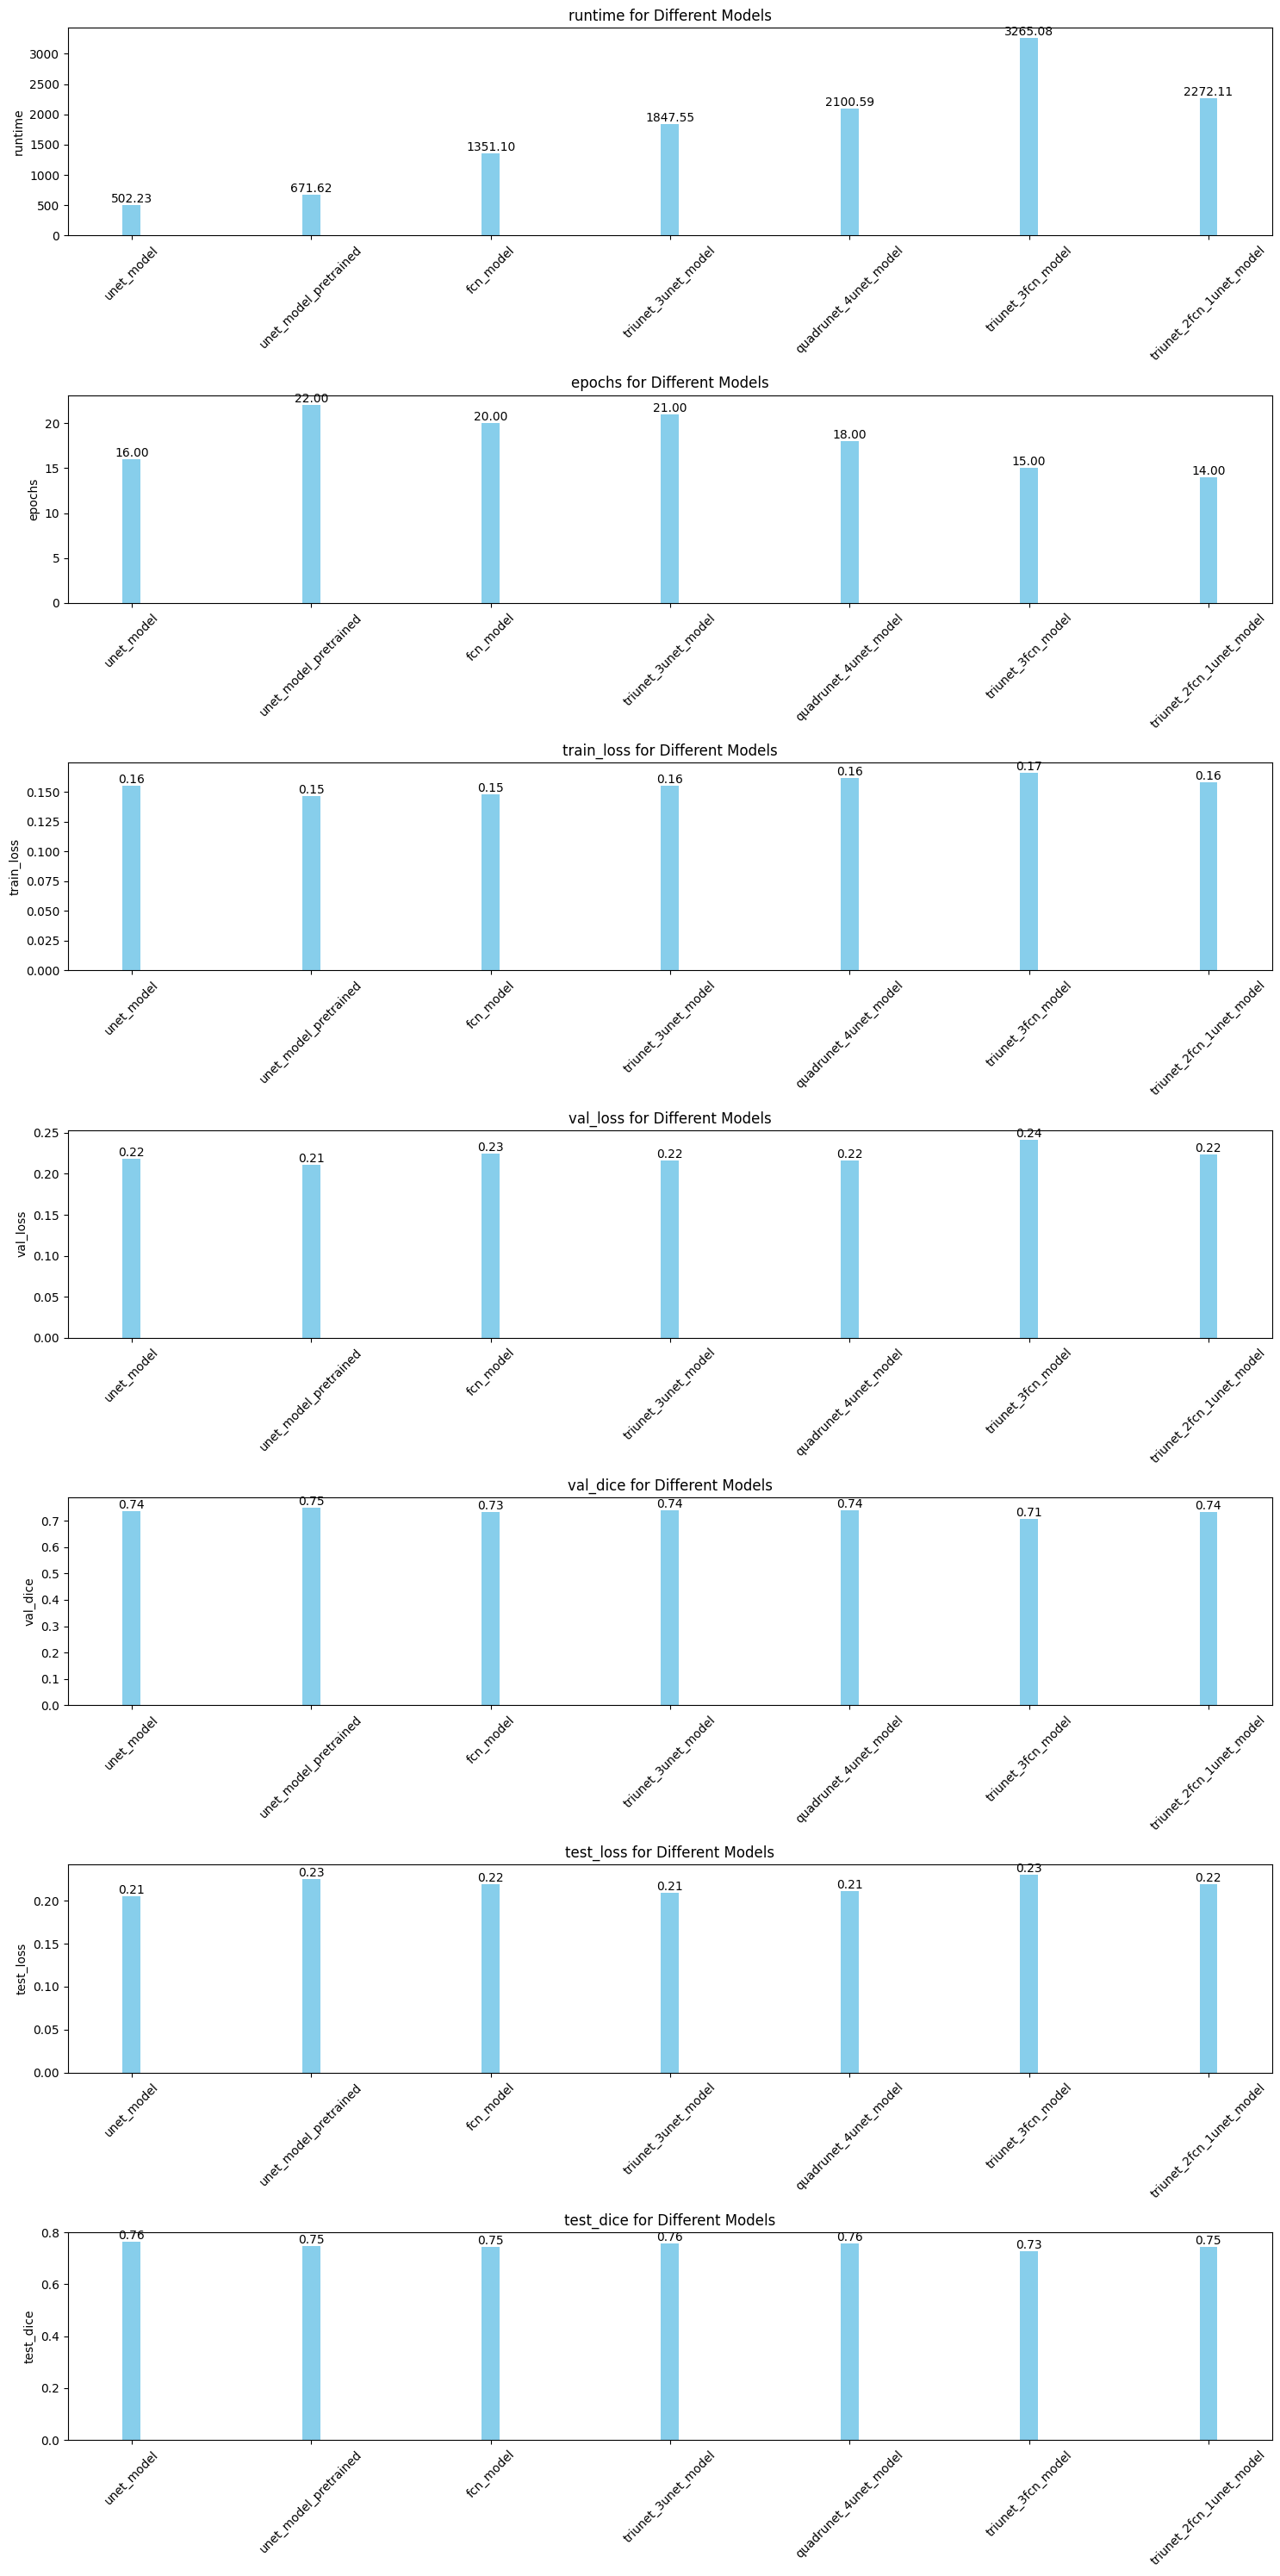

In [17]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(7, 1, figsize=(15, 30))

for i, column in enumerate(df.columns[df.columns != 'name']):
    axs[i].bar(df['name'], df[column], color='skyblue', width=0.1)
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column} for Different Models')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Write value to the bar
    for j, value in enumerate(df[column]):
        axs[i].text(j, value, format(value, '.2f'), ha='center', va='bottom')

plt.tight_layout()
plt.show()